In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('tips.csv')

In [4]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [122]:
def preprocessing_inputs(df):
    df=df.copy()
    # binary encode in binary columns
    df['sex'] = df['sex'].apply(lambda x: 1 if x=='Female' else 0)
    df['smoker'] = df['smoker'].replace({'No': 0,'Yes': 1})
    df['time'] = df['time'].apply(lambda x: 1 if x=='Dinner' else 0 )
    # ordinary encode 
    df['day'] = df['day'].replace({'Sat': 0,'Thur':1,'Fri':2,'Sun':3})
    # Split data 
    y = df['tip']
    X = df.drop(['tip'],axis = 'columns')
    # train df 
   # X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    # scaleing data
    #scaler.fit(X_train)
    #X_train =pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = X_train.columns) 
    #X_test = pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)
    return X,y

In [123]:
X['day'].unique()

array([3, 0, 1, 2], dtype=int64)

In [124]:
X,y = preprocessing_inputs(data)

In [129]:
X_train = X.loc[:180,:]

In [130]:
X_train

,total_bill,sex,smoker,day,time,size
0,16.99,1,0,3,1,2
1,10.34,0,0,3,1,3
2,21.01,0,0,3,1,3
3,23.68,0,0,3,1,2
4,24.59,1,0,3,1,4
...,...,...,...,...,...,...
176,17.89,0,1,3,1,2
177,14.48,0,1,3,1,2
178,9.60,1,1,3,1,2
179,34.63,0,1,3,1,2


In [131]:
X_test = X.loc[180:,:]

In [132]:

X_test

,total_bill,sex,smoker,day,time,size
180,34.65,0,1,3,1,4
181,23.33,0,1,3,1,2
182,45.35,0,1,3,1,3
183,23.17,0,1,3,1,4
184,40.55,0,1,3,1,2
...,...,...,...,...,...,...
239,29.03,0,0,0,1,3
240,27.18,1,1,0,1,2
241,22.67,0,1,0,1,2
242,17.82,0,0,0,1,2


In [133]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [135]:
y_train = y.loc[:180]

In [136]:
y_train

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
176    2.00
177    2.00
178    4.00
179    3.55
180    3.68
Name: tip, Length: 181, dtype: float64

In [137]:
y_test = y.loc[180:]

In [138]:
y_test

180    3.68
181    5.65
182    3.50
183    6.50
184    3.00
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 64, dtype: float64

In [125]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,1,0,3,1,2
1,10.34,0,0,3,1,3
2,21.01,0,0,3,1,3
3,23.68,0,0,3,1,2
4,24.59,1,0,3,1,4
...,...,...,...,...,...,...
239,29.03,0,0,0,1,3
240,27.18,1,1,0,1,2
241,22.67,0,1,0,1,2
242,17.82,0,0,0,1,2


In [126]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [154]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [155]:
reg = LinearRegression()

In [156]:
reg.fit(X_train,y_train)

LinearRegression()

In [157]:
reg.score(X_test,y_test)

0.2505884434805181

In [158]:
cross_val_score(LinearRegression(),X_test,y_test,cv=5)

array([-0.49361628,  0.49083032,  0.39844874, -1.36050424,  0.29366626])

In [159]:
cross_val_score(Ridge(),X_test,y_test,cv=4)

array([-0.18140237,  0.44994307,  0.40510004,  0.25286965])

In [163]:
cross_val_score(Lasso(),X_test,y_test,cv =6)

array([-0.54321772,  0.51796822,  0.30741141,  0.37604889, -0.16004364,
        0.07778532])

In [33]:
{column : len(X[column].unique()) for column in X.columns}

{'total_bill': 229,
 'tip': 123,
 'sex': 2,
 'smoker': 2,
 'day': 4,
 'time': 2,
 'size': 6}

In [34]:
X['time'].unique()

array([1, 0], dtype=int64)

In [37]:
# Plot  Subplot all Data

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
! pip install seaborn

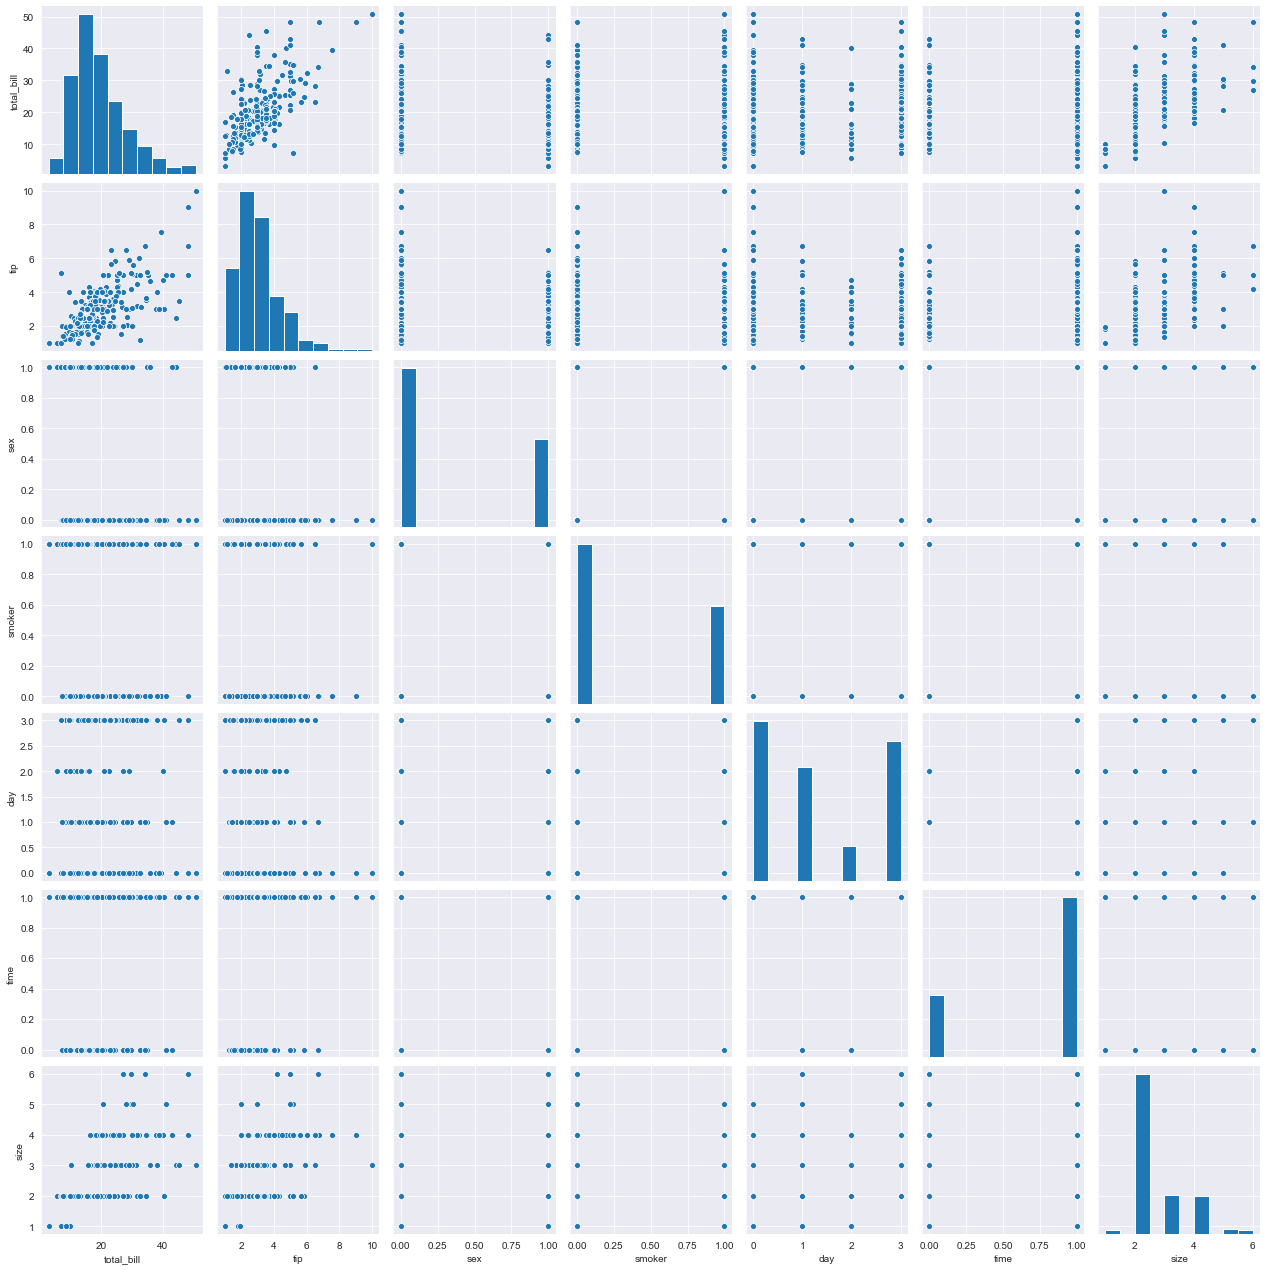

In [56]:
sns.pairplot(X)

In [57]:
X

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,0,1,3
240,27.18,2.00,1,1,0,1,2
241,22.67,2.00,0,1,0,1,2
242,17.82,1.75,0,0,0,1,2


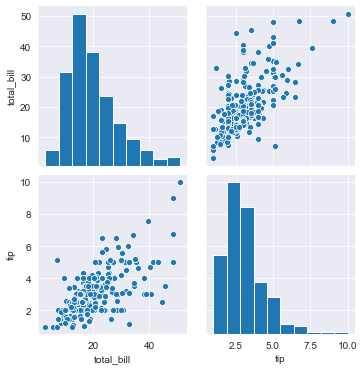

In [80]:
 sns.pairplot(X.loc[:,['total_bill','tip']])

In [81]:
result = X['tip'].value_counts()

In [82]:
result

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64

In [83]:
X.isna().sum().sum()

0

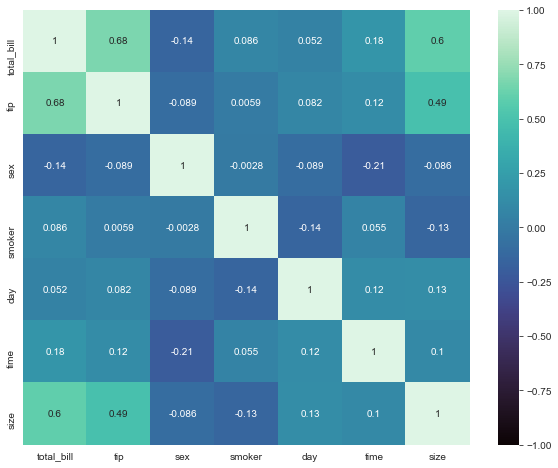

In [104]:
plt.figure(figsize = (10,8))
sn.heatmap(X.corr(),annot = True,vmin = -1.0,cmap = 'mako')


In [92]:
{column: len(X[column].unique())  for column in X.columns }

{'total_bill': 229,
 'tip': 123,
 'sex': 2,
 'smoker': 2,
 'day': 4,
 'time': 2,
 'size': 6}

In [98]:
[columns for columns in X.columns if len(X[columns].unique())==2]

['sex', 'smoker', 'time']

In [100]:
[columns for columns in X.columns if len(X[columns].unique())>2]

['total_bill', 'tip', 'day', 'size']

In [102]:
[column for column in X.columns  if len(X[column].unique())>2]

['total_bill', 'tip', 'day', 'size']